# Histogram Equalisation

A histogram of an image shows the frequency distribution of pixel brightness levels in a grayscale image.


It shows how many pixels correspond to each intensity value, ranging from 0 to 255. In a low-contrast image, the histogram is usually clustered around a narrow range of intensities  (most pixels have similar brightness), and a high-contrast image shows a more spread-out histogram (a wider range of intensity levels)

First we import the needed libraries.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import filters
from scipy.ndimage import uniform_filter
from google.colab.patches import cv2_imshow
from scipy.signal import correlate2d
import time

We see the initial image is as below:

array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [ 8,  8,  8],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)
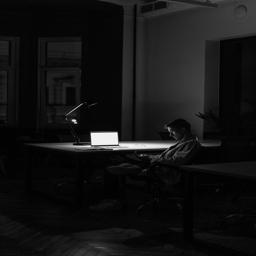

In [2]:
img_initial = cv2.imread('detective.png')
img_initial

We want to enhance the image and reveal what the person is sitting on. For doing so, we write a function histogram equalisation that takes this grayscale image as input and enhances the contrast, making the scene clearer.

Fist, we convert the image to greyscale and convert it to a numpy array as below:

In [3]:
greyscale_img = cv2.cvtColor(img_initial, cv2.COLOR_BGR2GRAY)
img_np = np.array(greyscale_img)

Next, we define a function to compute the histogram of the image as below:

In [4]:
def compute_histogram(image, bins=256, range=(0, 256), density=True):

    # The histogram bins
    hist = [0] * bins
    width = (range[1] - range[0]) / bins

    # Compute the histogram
    for pixel in image:
        if range[0] <= pixel < range[1]:
            idx = int((pixel - range[0]) // width)
            hist[idx] += 1

    # Normalize the histogram
    if density:
        total = len(image)
        hist = list(map(lambda count: count / (width * total), hist))

    return hist

Next, we define two functions to compute the PDF and then the CDF for the correesponding image.


For computing the PDF, we flatten the image and calculate the histogram using np.histogram from numpy library.

For computing the CDF, we get the cumulative sum of the PDF and normalize it to the range [0,1]

In [5]:
def create_pdf(im_in):
    hist = compute_histogram(im_in.flatten(), bins=256, range=(0, 256), density=True)
    return hist

def create_cdf(pdf):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]
    return cdf

We compute the PDF and CDF of the original image as below:

In [6]:
pdf_initial = create_pdf(img_np)
cdf_initial = create_cdf(img_np)

Now that we have these functions, we are able to implement the histogram_equalization function:

In [7]:
def histogram_equalization(im_in):

    # First get the PDF and CDF
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)

    # transform pixel values based on the CDF
    new_img = (cdf[im_in.flatten()] * 255).reshape(im_in.shape)

    return new_img

Now, we compute the PDF and CDF after applying histogram equalization:

In [8]:
# histogram equalization
new_image = histogram_equalization(img_np)

# PDF and CDF after equalization
pdf_new = create_pdf(new_image)
cdf_new = create_cdf(pdf_new)

Comparing the PDF before and after equalization:

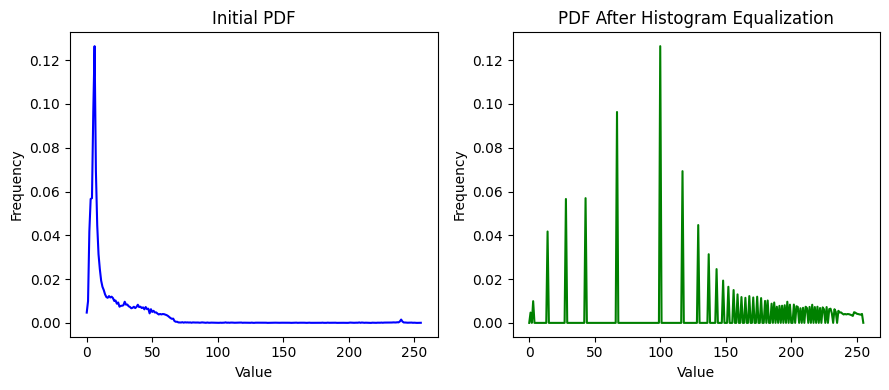

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

ax1.plot(pdf_initial, color='blue')
ax1.set_title('Initial PDF')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.plot(pdf_new, color='green')
ax2.set_title('PDF After Histogram Equalization')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Comparing the CDF before and after equalization:

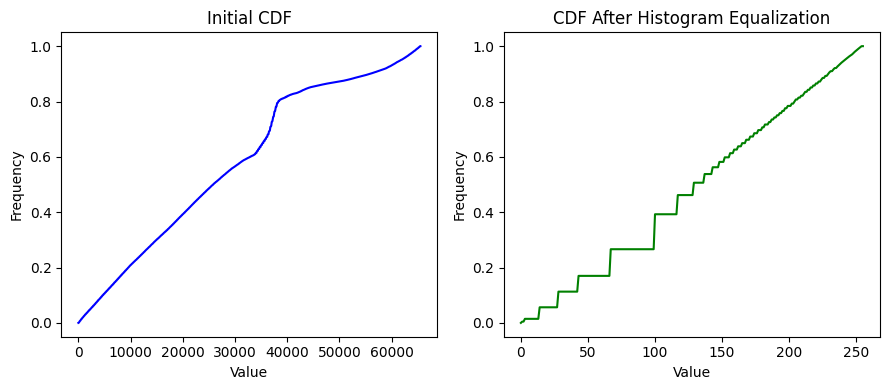

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

ax1.plot(cdf_initial, color='blue')
ax1.set_title('Initial CDF')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.plot(cdf_new, color='green')
ax2.set_title('CDF After Histogram Equalization')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Finally we plot the enhanced image after histogram equalization.

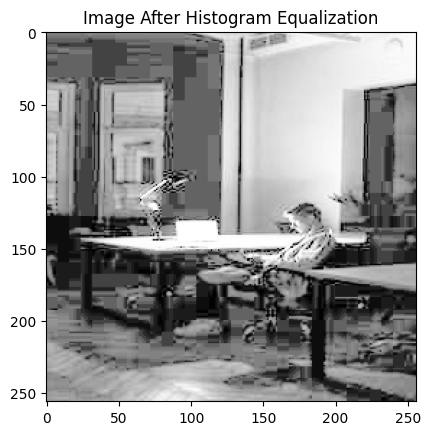

In [11]:
plt.imshow(new_image, cmap='gray')
plt.title('Image After Histogram Equalization')
plt.show()

As we cans see, the person is sitting on an office rolling chair.

### *Before Equalization*

The image shows minimal differences between the dark and light areas.

PDF: In a low-contrast image, the PDF is tightly grouped around a narrow range of intensity values.

CDF: The CDF has sharp increases in specific sections, which shows the limited intensity range in the image.

### *After Equalization*


The image shows better contrast, which brings the hidden details to light.

PDF: It spreads out more since a wider range of intensity values is used in the image.

CDF: The CDF becomes more linear, which shows that intensity values are more evenly distributed across the image.